* This Code created by: Olaiyan Alolaiyan - Anantram Group - Uniververity of Washington

In [1]:
# %% Cell 1: Imports
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [2]:
# %% Cell 2: Configuration
# One place to keep file names, titles, and run durations in ns
runs = [
    dict(path='rmsd_DCnb01.mat',
         label='RMSD DNA-CNT (No linker)',
         duration=100),
    dict(path='rmsd_DLC.mat',
         label='RMSD DNA-Amino.Linker-CNT',
         duration=100),
    dict(path='rmsd_DEC.mat',
         label='RMSD DNA-Ester.Linker-CNT',
         duration=100),
]

# Color scale limits
vmin = 0
vmax = 12


In [3]:
# %% Cell 3: Heatmap function
def create_heatmap(data, title, duration_ns, tick_ns, vmin=None, vmax=None):
    """
    data: 2D RMSD matrix
    title: plot title
    duration_ns: total run length (ns)
    tick_ns: spacing between ticks (ns)
    """
    total_frames = data.shape[0]
    fps = total_frames / duration_ns

    # tick positions in frames
    tick_times = np.arange(0, duration_ns + 1, tick_ns)
    tick_frames = (tick_times * fps).astype(int)

    # tick labels
    tick_labels = [f"{int(t)}ns" if t < 1000 else f"{t/1000:.1f}µs"
                   for t in tick_times]

    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(
        data,
        cmap='turbo',
        cbar_kws={'label': 'RMSD (Å)'},
        vmin=vmin,
        vmax=vmax
    )
    ax.set_xticks(tick_frames)
    ax.set_xticklabels(tick_labels, rotation=0, fontsize=12)
    ax.set_yticks(tick_frames)
    ax.set_yticklabels(tick_labels, rotation=0, fontsize=12)

    plt.title(title, fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Reference Time', fontsize=14)
    plt.tight_layout()

    # save figure
    fname = title.replace(' ', '_').replace('–', '_').replace('.', '') + '.png'
    plt.savefig(fname, dpi=300)
    plt.show()


Processing RMSD DNA-CNT (No linker)…


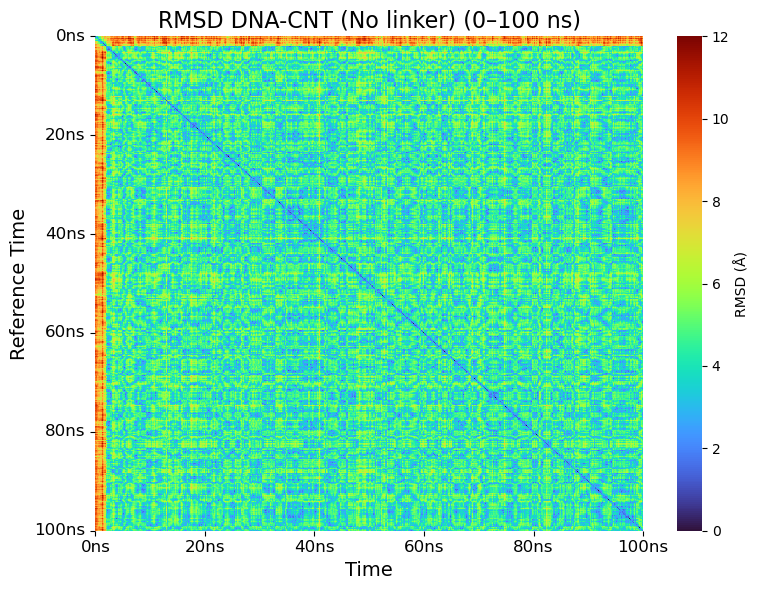

Processing RMSD DNA-Amino.Linker-CNT…


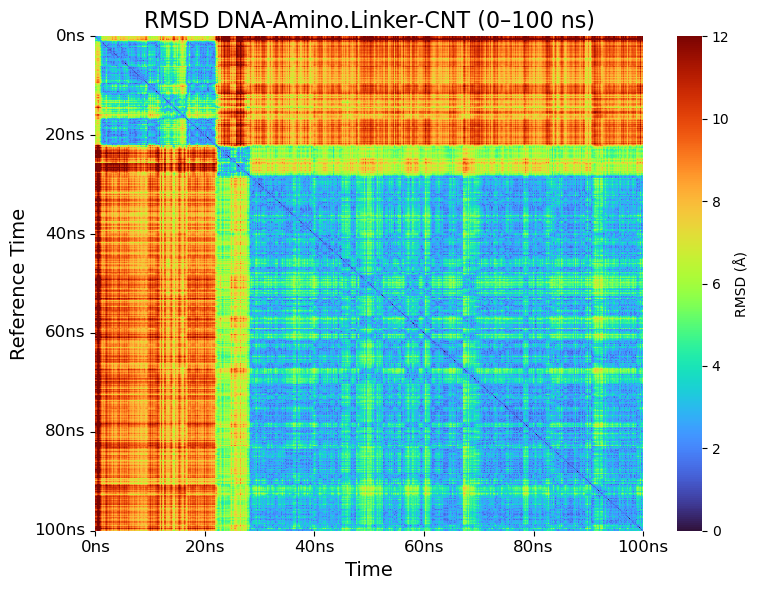

Processing RMSD DNA-Ester.Linker-CNT…


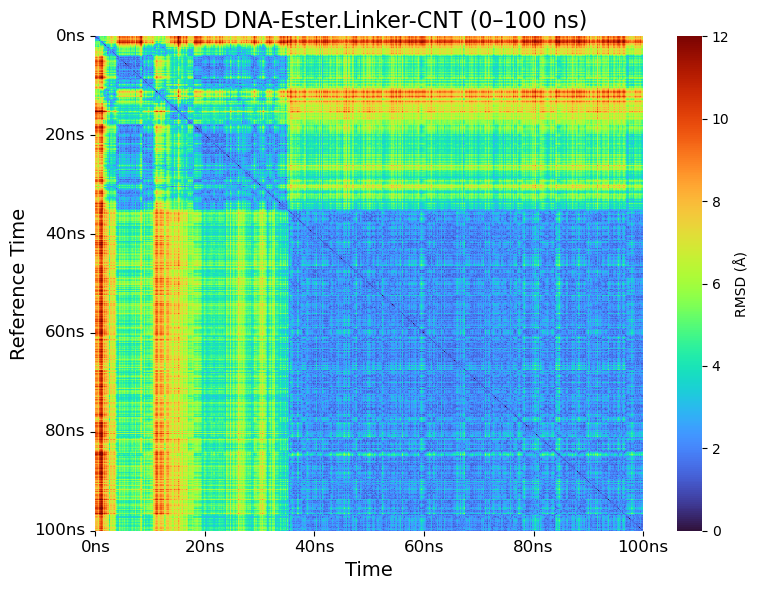

In [4]:
# %% Cell 4: Load & Plot
for run in runs:
    print(f"Processing {run['label']}…")
    mat = sio.loadmat(run['path'])
    data = mat.get('rmsd_matrix')
    if data is None:
        raise KeyError(f"'rmsd_matrix' not found in {run['path']}")

    # Full 0–duration plot
    create_heatmap(
        data,
        title=f"{run['label']} (0–{run['duration']} ns)",
        duration_ns=run['duration'],
        tick_ns=20,
        vmin=vmin,
        vmax=vmax
    )

    # If you ever have runs longer than 100 ns and want the 0–100 ns subset:
    if run['duration'] > 100:
        total_frames = data.shape[0]
        fps = total_frames / run['duration']
        subset = data[:int(100 * fps), :int(100 * fps)]
        create_heatmap(
            subset,
            title=f"{run['label']} (0–100 ns subset)",
            duration_ns=100,
            tick_ns=20,
            vmin=vmin,
            vmax=vmax
        )

    del data, mat
    gc.collect()
